In [50]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [63]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [48]:
X_train.shape

(60000, 28, 28)

In [47]:
X_test.shape

(10000, 28, 28)

In [45]:
single_image= X_train[9]

In [46]:
single_image.shape

(28, 28)

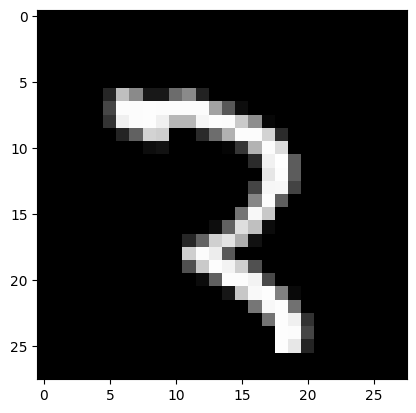

In [44]:
plt.imshow(single_image,cmap='gray')

In [51]:
y_train.shape

(60000,)

In [52]:
X_train.min()

0

In [53]:
X_train.max()

255

In [54]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [55]:
X_train_scaled.min()

0.0

In [56]:
X_train_scaled.max()

1.0

In [57]:
y_train[0]

5

In [58]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [59]:
type(y_train_onehot)

numpy.ndarray

In [60]:
y_train_onehot.shape

(60000, 10)

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [61]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [62]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [27]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=16, kernel_size=(9,9), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(3,3)))
model.add(layers.Flatten())
model.add(layers.Dense(65,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 20, 20, 16)        1312      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 576)               0         
                                                                 
 dense_2 (Dense)             (None, 65)                37505     
                                                                 
 dense_3 (Dense)             (None, 10)                660       
                                                                 
Total params: 39477 (154.21 KB)
Trainable params: 39477 (154.21 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [30]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [34]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,batch_size=64,validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 25s 26ms/step - loss: 0.0338 - accuracy: 0.9892 - val_loss: 0.0343 - val_accuracy: 0.9890
Epoch 2/5
938/938 [==============================] - 25s 26ms/step - loss: 0.0286 - accuracy: 0.9909 - val_loss: 0.0325 - val_accuracy: 0.9903
Epoch 3/5
938/938 [==============================] - 25s 26ms/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.0394 - val_accuracy: 0.9882
Epoch 4/5
938/938 [==============================] - 26s 27ms/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0332 - val_accuracy: 0.9900
Epoch 5/5
938/938 [==============================] - 25s 26ms/step - loss: 0.0179 - accuracy: 0.9939 - val_loss: 0.0351 - val_accuracy: 0.9899


In [35]:
metrics = pd.DataFrame(model.history.history)

In [36]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.033815,0.989233,0.034286,0.9890
1,0.028612,0.990950,0.032475,0.9903
2,0.024171,0.992350,0.039402,0.9882
3,0.021063,0.993383,0.033155,0.9900
4,0.017949,0.993917,0.035054,0.9899


Name:vijayaraj v Reg.No:212222230174 


<Axes: >

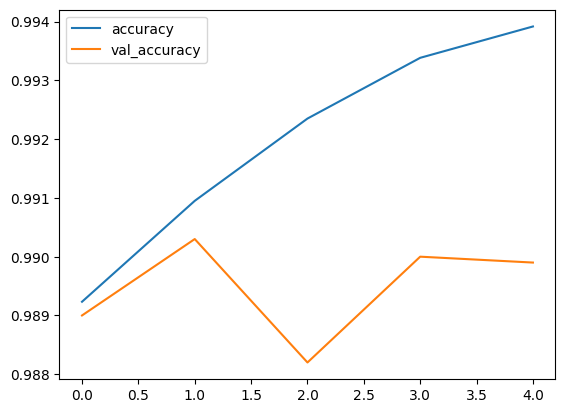

In [37]:
print("Name:vijayaraj v Reg.No:212222230174 ")
metrics[['accuracy','val_accuracy']].plot()

Name:vijayaraj v Reg.No:212222230174 


<Axes: >

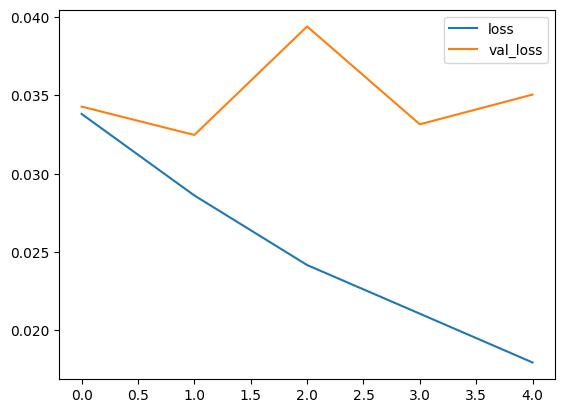

In [38]:
print("Name:vijayaraj v Reg.No:212222230174 ")
metrics[['loss','val_loss']].plot()

In [42]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 5ms/step


In [40]:
print("Name:vijayaraj v Reg.No:212222230174 ")
print(confusion_matrix(y_test,x_test_predictions))



Name:vijayaraj v Reg.No:212222230174 
[[ 975    1    0    0    0    0    1    2    1    0]
 [   0 1133    0    1    0    0    1    0    0    0]
 [   0    1 1024    0    1    0    0    5    1    0]
 [   0    0    0 1004    0    4    0    1    1    0]
 [   0    0    0    0  972    0    1    2    1    6]
 [   2    0    1    4    0  882    2    1    0    0]
 [   3    3    0    0    1    1  950    0    0    0]
 [   0    0    1    2    0    0    0 1025    0    0]
 [   7    0    4    0    0    1    2    2  955    3]
 [   1    1    2    0    6    9    0   11    0  979]]


In [41]:
print("Name:vijayaraj v Reg.No:212222230174 ")
print(classification_report(y_test,x_test_predictions))

Name:vijayaraj v Reg.No:212222230174 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



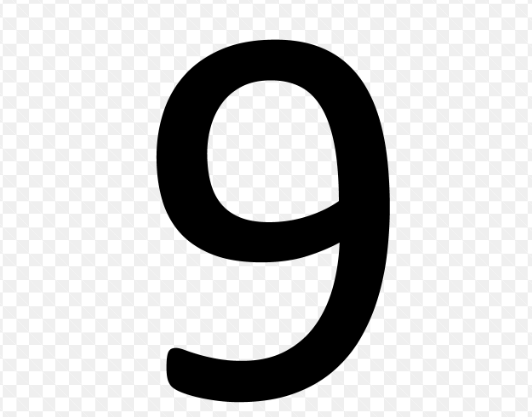

In [64]:
img = image.load_img('9.png')

img



In [65]:
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [66]:
x_single_prediction = np.argmax(model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)

1/1 [==============================] - 0s 39ms/step


In [67]:
print(x_single_prediction)

[9]


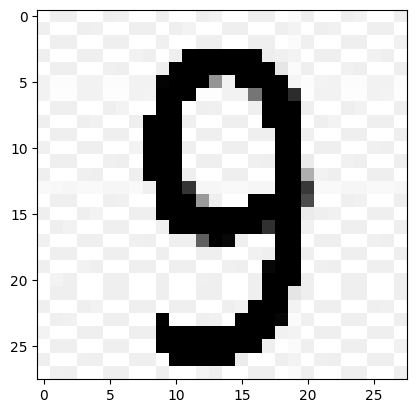

In [68]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [69]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [70]:
x_single_prediction = np.argmax(model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),axis=1)

1/1 [==============================] - 0s 40ms/step


In [71]:
print(x_single_prediction)

[9]
